# PM2.5数据抓取，清洗和挖掘

# 1. PM2.5数据抓取 

In [1]:
import urllib2
from bs4 import BeautifulSoup

## 1.1 天涯关于PM2.5主题数据的抓取

In [6]:
from IPython.display import display_html, HTML
HTML('<iframe src=http://bbs.tianya.cn/list.jsp?item=free&nextid=%d&order=8&k=PM2.5 width=1000 height=500></iframe>')

In [7]:
page_num = 0
url = "http://bbs.tianya.cn/list.jsp?item=free&nextid=%d&order=8&k=PM2.5" %page_num
content = urllib2.urlopen(url).read() #获取网页的html文本
soup = BeautifulSoup(content, "lxml") 
articles = soup.find_all('tr')

In [8]:
print articles[0]

<tr>
<th scope="col"> 标题</th>
<th scope="col">作者</th>
<th scope="col">点击</th>
<th scope="col">回复</th>
<th scope="col">发表时间</th>
</tr>


In [9]:
len(articles[1:])

50

In [10]:
for t in articles[1].find_all('td'): print t

<td class="td-title ">
<span class="face" title="">
</span>
<a href="/post-free-5305449-1.shtml" target="_blank">
							严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图)<span class="art-ico art-ico-3" title="内有0张图片"></span>
</a>
</td>
<td><a class="author" href="http://www.tianya.cn/105514428" target="_blank">静静的莲花</a></td>
<td>31057</td>
<td>175</td>
<td title="2015-11-09 14:17">11-09 14:17</td>


In [11]:
for t in articles[1].find_all('td'): print t

<td class="td-title ">
<span class="face" title="">
</span>
<a href="/post-free-5305449-1.shtml" target="_blank">
							严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图)<span class="art-ico art-ico-3" title="内有0张图片"></span>
</a>
</td>
<td><a class="author" href="http://www.tianya.cn/105514428" target="_blank">静静的莲花</a></td>
<td>31057</td>
<td>175</td>
<td title="2015-11-09 14:17">11-09 14:17</td>


In [12]:
td = articles[1].find_all('td')

In [13]:
print td

[<td class="td-title ">\n<span class="face" title="">\n</span>\n<a href="/post-free-5305449-1.shtml" target="_blank">\r\n\t\t\t\t\t\t\t\u4e25\u91cd\u96fe\u973e\u5929\u6c14 \u6c88\u9633PM2.5\u6d53\u5ea6\u8fc7\u5343.\u627e\u4eae\u70b9(\u6709\u56fe)<span class="art-ico art-ico-3" title="\u5185\u67090\u5f20\u56fe\u7247"></span>\n</a>\n</td>, <td><a class="author" href="http://www.tianya.cn/105514428" target="_blank">\u9759\u9759\u7684\u83b2\u82b1</a></td>, <td>31057</td>, <td>175</td>, <td title="2015-11-09 14:17">11-09 14:17</td>]


In [14]:
print td[0]

<td class="td-title ">
<span class="face" title="">
</span>
<a href="/post-free-5305449-1.shtml" target="_blank">
							严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图)<span class="art-ico art-ico-3" title="内有0张图片"></span>
</a>
</td>


In [15]:
print td[0].text.strip()

严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图)


In [16]:
print td[0].a['href']

/post-free-5305449-1.shtml


In [17]:
records = []
for i in articles[1:]:
    td = i.find_all('td')
    title = td[0].text.strip()
    title_url = td[0].a['href']
    author = td[1].text
    author_url = td[1].a['href']
    views = td[2].text
    replies = td[3].text
    date = td[4]['title']
    record = title + '\t' + title_url+ '\t' + author + '\t'+ author_url + '\t' + views+ '\t'  + replies+ '\t'+ date
    records.append(record)

In [18]:
print records[3]

青岛李沧爱尔城运动工厂--可过滤PM2.5体育场馆	/post-free-4835068-1.shtml	眼镜兔er	http://www.tianya.cn/97272912	8374	23	2014-12-13 10:23


In [19]:
def crawler(page_num, file_name):
    try:
        # open the browser
        url = "http://bbs.tianya.cn/list.jsp?item=free&nextid=%d&order=8&k=PM2.5" % page_num
        content = urllib2.urlopen(url).read() #获取网页的html文本
        soup = BeautifulSoup(content, "lxml") 
        articles = soup.find_all('tr')
        # write down info
        for i in articles[1:]:
            td = i.find_all('td')
            title = td[0].text.strip()
            title_url = td[0].a['href']
            author = td[1].text
            author_url = td[1].a['href']
            views = td[2].text
            replies = td[3].text
            date = td[4]['title']
            record = title + '\t' + title_url+ '\t' + author + '\t'+ \
                        author_url + '\t' + views+ '\t'  + replies+ '\t'+ date
            with open(file_name,'a') as p: # '''Note'''：Ａppend mode, run only once!
                        p.write(record.encode('utf-8')+"\n") ##!!encode here to utf-8 to avoid encoding

    except Exception, e:
        print e
        pass

In [20]:
for page_num in range(10):
    print (page_num)
    crawler(page_num, '/Users/dingjiayi/Desktop/data/tianyapm.txt') 

0
1
2
3
4
5
6
7
8
9


In [21]:
import pandas as pd

df = pd.read_csv('/Users/dingjiayi/Desktop/data/tianyapm.txt', sep = "\t", header=None)
df

,0,1,2,3,4,5,6
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46
2,",【老虎画画】帝都PM2.5,需要配合的谎言",/post-free-3011875-1.shtml,唐伯虎瞎画画,http://www.tianya.cn/43393067,11504,99,2013-01-13 17:20
3,青岛李沧爱尔城运动工厂--可过滤PM2.5体育场馆,/post-free-4835068-1.shtml,眼镜兔er,http://www.tianya.cn/97272912,8374,23,2014-12-13 10:23
4,骆家辉让中国人知道什么是PM2.5,/post-free-3825633-1.shtml,没有救世主007,http://www.tianya.cn/65737926,7403,11,2013-11-21 11:26
5,你今天又吸入了多少PM2.5?(转载),/post-free-4524650-1.shtml,cypress0818,http://www.tianya.cn/79828445,6562,21,2014-07-30 22:32
6,"雾霾天无聊做了个实测室内PM2.5,有木有人来围观结果",/post-free-3856677-1.shtml,aileencyh,http://www.tianya.cn/72141286,6033,154,2013-12-03 11:57
7,哪个品牌的pm2.5口罩能真正防pm2.5?,/post-free-3783861-1.shtml,初秋絮语123,http://www.tianya.cn/84866276,5193,2,2013-11-04 10:57
8,PM2.5又爆表 还是在家骑自行车吧,/post-free-3802295-1.shtml,dgrg5t4h,http://www.tianya.cn/41225348,2381,7,2013-11-11 15:03
9,霾汰人的PM2.5,/post-free-3794862-1.shtml,天海原住民,http://www.tianya.cn/84967699,1823,237,2013-11-08 09:42


In [22]:
len(df)

193

## 1.2 天涯 抓取作者信息

In [23]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46


In [24]:
df.author_page[:5]

0    http://www.tianya.cn/105514428
1      http://www.tianya.cn/8240809
2     http://www.tianya.cn/43393067
3     http://www.tianya.cn/97272912
4     http://www.tianya.cn/65737926
Name: author_page, dtype: object

In [25]:
def author_crawler(url, file_name):
    try:
        content = urllib2.urlopen(url).read() #获取网页的html文本
        soup = BeautifulSoup(content, "lxml")
        link_info = soup.find_all('div', {'class', 'link-box'})
        followed_num, fans_num = [i.a.text for i in link_info]
        try:
            activity = soup.find_all('span', {'class', 'subtitle'})
            post_num, reply_num = [j.text[2:] for i in activity[:1] for j in i('a')]
        except:
            post_num, reply_num = 1, 0
        record =  '\t'.join([url, followed_num, fans_num, post_num, reply_num])
        with open(file_name,'a') as p: # '''Note'''：Ａppend mode, run only once!
                    p.write(record.encode('utf-8')+"\n") ##!!encode here to utf-8 to avoid encoding

    except Exception, e:
        print e, url
        record =  '\t'.join([url, 'na', 'na', 'na', 'na'])
        with open(file_name,'a') as p: # '''Note'''：Ａppend mode, run only once!
                    p.write(record.encode('utf-8')+"\n") ##!!encode here to utf-8 to avoid encoding
        pass

In [26]:
for k, url in enumerate(df.author_page):
    if k % 10==0:
        print k
    author_crawler(url, '/Users/dingjiayi/Desktop/data/tianyapmauthor.txt') 

0
10
need more than 0 values to unpack http://www.tianya.cn/38464560
20
30
40
50
60
70
sequence item 3: expected string or Unicode, int found http://www.tianya.cn/85308944
80
90
100
110
need more than 0 values to unpack http://www.tianya.cn/82024030
120
need more than 0 values to unpack http://www.tianya.cn/39343226
130
need more than 0 values to unpack http://www.tianya.cn/28481443
140
150
160
170
180
190


In [27]:
url = df.author_page[1]
content = urllib2.urlopen(url).read() #获取网页的html文本
soup1 = BeautifulSoup(content, "lxml") 

In [30]:
user_info

[<p><span>\u5730\u3000\u3000\u533a</span>\u5e7f\u4e1c\u5ee3\u5dde</p>,
 <p><span>\u79ef\u3000\u3000\u5206</span>109515</p>,
 <p><span>\u767b\u5f55\u6b21\u6570</span>4037</p>,
 <p><span>\u6700\u65b0\u767b\u5f55</span>2016-05-21 18:37:36</p>,
 <p><span>\u6ce8\u518c\u65e5\u671f</span>2006-08-26 07:38:00</p>]

In [29]:
user_info = soup1.find('div',  {'class', 'userinfo'})('p')
area, nid, freq_use, last_login_time, reg_time = [i.get_text()[1:] for i in user_info]
print area, nid, freq_use, last_login_time, reg_time 

link_info = soup1.find_all('div', {'class', 'link-box'})
followed_num, fans_num = [i.a.text for i in link_info]
print followed_num, fans_num

　　区广东廣州 　　分109515 录次数4037 新登录2016-05-21 18:37:36 册日期2006-08-26 07:38:00
14 10248


In [31]:
user_info = soup1.find('div',  {'class', 'userinfo'})('p')
area, nid, freq_use, last_login_time, reg_time = [i.get_text()[4:] for i in user_info]
print area, nid, freq_use, last_login_time, reg_time 

link_info = soup1.find_all('div', {'class', 'link-box'})
followed_num, fans_num = [i.a.text for i in link_info]
print followed_num, fans_num

广东廣州 109515 4037 2016-05-21 18:37:36 2006-08-26 07:38:00
14 10248


In [32]:
activity = soup1.find_all('span', {'class', 'subtitle'})
post_num, reply_num = [j.text[2:] for i in activity[:1] for j in i('a')]
print post_num, reply_num

10161 16293


In [33]:
print activity[0]

<span class="subtitle"><a href="http://www.tianya.cn/8240809/bbs?t=post">主帖10161</a>　<a href="http://www.tianya.cn/8240809/bbs?t=reply">回帖16293</a></span>


In [34]:
link_info = soup1.find_all('div', {'class', 'link-box'})
followed_num, fans_num = [i.a.text for i in link_info]
print followed_num, fans_num

14 10248


In [35]:
link_info[0].a.text

u'14'

## 1.3  天涯 抓取回帖

In [36]:
df.link[2]

'/post-free-3011875-1.shtml'

In [37]:
url = 'http://bbs.tianya.cn' + df.link[2]
url

'http://bbs.tianya.cn/post-free-3011875-1.shtml'

In [38]:
from IPython.display import display_html, HTML
HTML('<iframe src=http://bbs.tianya.cn/post-free-3011875-1.shtml width=1000 height=500></iframe>')

In [39]:
post = urllib2.urlopen(url).read() #获取网页的html文本
post_soup = BeautifulSoup(post, "lxml") 
#articles = soup.find_all('tr')

In [40]:
print (post_soup.prettify())[:5000]

<!DOCTYPE HTML>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   ,【老虎画画】帝都PM2.5，需要配合的谎言_天涯杂谈_天涯论坛
  </title>
  <meta content=",【老虎画画】帝都PM2.5，需要配合的谎言　　　　文/唐伯虎瞎画画　　帝都PM2.5录得超过1000，微薄上到处都是关于它的消息，新闻爆炸程度有如刘翔承认假跑，每一条与此有关的微薄都像足发了疯飞出来蜇人的野蜂。与上回帝都海浪中漂流事件略有不同是，微薄小秘书大概不用加班勤奋销贴了。想想手..." name="description"/>
  <meta content="IE=EmulateIE9" http-equiv="X-UA-Compatible"/>
  <meta content="唐伯虎瞎画画" name="author"/>
  <meta content="format=xhtml; url=http://bbs.tianya.cn/m/post-free-3011875-1.shtml" http-equiv="mobile-agent"/>
  <link href="http://static.tianyaui.com/global/ty/TY.css" rel="stylesheet" type="text/css"/>
  <link href="http://static.tianyaui.com/global/bbs/web/static/css/bbs_article_b719ad6.css" rel="stylesheet" type="text/css"/>
  <link href="http://static.tianyaui.com/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <script type="text/javascript">
   var bbsGlobal = {
	isEhomeItem : false,
	isNewArticle : false,
	authorId : "43393067",
	authorName : "唐伯虎瞎画画", 
	blo

In [41]:
pa = post_soup.find_all('div', {'class', 'atl-item'})
len(pa)

89

In [42]:
print pa[0]

<div _host="%E5%94%90%E4%BC%AF%E8%99%8E%E7%9E%8E%E7%94%BB%E7%94%BB" class="atl-item host-item">
<div class="atl-content">
<div class="atl-con-hd clearfix">
<div class="atl-con-hd-l"></div>
<div class="atl-con-hd-r"></div>
</div>
<div class="atl-con-bd clearfix">
<div class="bbs-content clearfix">
							　　<br/>
　　文/唐伯虎瞎画画<br/>
<br/>
<br/>
　　帝都PM2.5录得超过1000，微薄上到处都是关于它的消息，新闻爆炸程度有如刘翔承认假跑，每一条与此有关的微薄都像足发了疯飞出来蜇人的野蜂。与上回帝都海浪中漂流事件略有不同是，微薄小秘书大概不用加班勤奋销贴了。想想手握小秘书权力背后那些年轻的小姑娘小伙们，有幸得到这样一份工作，必定在人类进化史上谱写新的篇章——我毫不怀疑从他们她们当中，能进化出人类第一批双手十五指、二十指的物种精英，熟练操纵特制101键盘上100个Delete键，富士康工厂里那些日夜旋转不停的机器臂也望尘莫及。历史会牢牢将他们她们和那些人记住。<br/>
<br/>
　　其实PM2.5还是PM250是个什么玩意，一般人都说不出个所以然。就像那些总是会向你下不知所谓命令的领导，你不知道他是牛逼，还是2逼。只是知道，数值越高，它代表越不适合人类居住。平日里，PM2.5到底怎么样存在与危害，看不到摸不着，有个美领事馆天天免费播报吧，又不要工钱，不增加你的三公，结果差点给当成境外势力关进小黑屋，再加告它们一条侵犯国家秘密罪。如此算来PM2.5至少有2.5种以上的标准，至少我们会把它弄成这样。我们就是这么干的，无论是空气、食品，还是其它所有不同的一切。什么事进入中国，就像隔着毛玻璃播放AV，一边原声叫得人魂不守舍，一边现场配音听来却是字正腔圆的CCAV庄严朗诵体，玻璃外的你就不知该信谁。听多了，人自然就精神分裂，不开着七点档的节目，房事进行就会有困难。因此有人就认为，七点档节目的重要性，关系到种族繁衍，非常有必要加强再加强，统一再统一。

In [43]:
print pa[0].find('div', {'class', 'bbs-content'}).text.strip()

文/唐伯虎瞎画画


　　帝都PM2.5录得超过1000，微薄上到处都是关于它的消息，新闻爆炸程度有如刘翔承认假跑，每一条与此有关的微薄都像足发了疯飞出来蜇人的野蜂。与上回帝都海浪中漂流事件略有不同是，微薄小秘书大概不用加班勤奋销贴了。想想手握小秘书权力背后那些年轻的小姑娘小伙们，有幸得到这样一份工作，必定在人类进化史上谱写新的篇章——我毫不怀疑从他们她们当中，能进化出人类第一批双手十五指、二十指的物种精英，熟练操纵特制101键盘上100个Delete键，富士康工厂里那些日夜旋转不停的机器臂也望尘莫及。历史会牢牢将他们她们和那些人记住。

　　其实PM2.5还是PM250是个什么玩意，一般人都说不出个所以然。就像那些总是会向你下不知所谓命令的领导，你不知道他是牛逼，还是2逼。只是知道，数值越高，它代表越不适合人类居住。平日里，PM2.5到底怎么样存在与危害，看不到摸不着，有个美领事馆天天免费播报吧，又不要工钱，不增加你的三公，结果差点给当成境外势力关进小黑屋，再加告它们一条侵犯国家秘密罪。如此算来PM2.5至少有2.5种以上的标准，至少我们会把它弄成这样。我们就是这么干的，无论是空气、食品，还是其它所有不同的一切。什么事进入中国，就像隔着毛玻璃播放AV，一边原声叫得人魂不守舍，一边现场配音听来却是字正腔圆的CCAV庄严朗诵体，玻璃外的你就不知该信谁。听多了，人自然就精神分裂，不开着七点档的节目，房事进行就会有困难。因此有人就认为，七点档节目的重要性，关系到种族繁衍，非常有必要加强再加强，统一再统一。北方还这么冷入骨髓，冰着冻落着雪，南方怎么能春暖开花天天度周末？都冻上呗，冬天必须是这个样子，我们的冬天有我们的标准，想暖和，等着都变成南方那么暖和再说。当然，环球报说，现在都像南方这样暖，那是绝对不可能的。

　　据北京同学最直观的反映是，彩色的帝都，今天变成了灰白像片。再远一点，那是电视断了天线，屏幕都直播同一片灰色的雪。

　　想想帝都的人怎么那样娇气，老舍笔下黄土之城到现在的灰白之城，除了奥运会那阵撤去过现场配音，让你见识到原声是怎么回事，你不一直生活在这样的城市之中？现在怎么就受不了了？环球报说得好，从前一直都这样，两三天你就受不了了，过去一直受得了，今天怎么就不行了？很让人怀疑你们都是被境外势力下了蛊，不能好好配合让帝都的PM2.5降下来？怎么能没有这么一点大

In [44]:
print pa[87].find('div', {'class', 'bbs-content'}).text.strip()

@我爱爆料2000 85楼 2013-02-04 09:17:54　　习惯就好，要淡定　　-----------------------------　　习近平谈雾霾：用生活的淡定去面对　　你好,领导


In [45]:
pa[1].a

<a class="js-vip-check" href="http://www.tianya.cn/43393067" target="_blank" uid="43393067" uname="\u5510\u4f2f\u864e\u778e\u753b\u753b">\u5510\u4f2f\u864e\u778e\u753b\u753b</a>

In [46]:
print pa[0].find('a', class_ = 'reportme a-link')

<a author="唐伯虎瞎画画" authorid="43393067" class="reportme a-link" href="javascript:void(0);" replyid="0" replytime="2013-01-13 17:20:00"> 举报</a>


In [47]:
print pa[0].find('a', class_ = 'reportme a-link')['replytime']

2013-01-13 17:20:00


In [48]:
print pa[0].find('a', class_ = 'reportme a-link')['author']

唐伯虎瞎画画


In [49]:
for i in pa[:10]:
    p_info = i.find('a', class_ = 'reportme a-link')
    p_time = p_info['replytime']
    p_author_id = p_info['authorid']
    p_author_name = p_info['author']
    p_content = i.find('div', {'class', 'bbs-content'}).text.strip()
    p_content = p_content.replace('\t', '')
    print p_time, '--->', p_author_id, '--->', p_author_name,'--->', p_content, '\n'

2013-01-13 17:20:00 ---> 43393067 ---> 唐伯虎瞎画画 ---> 文/唐伯虎瞎画画


　　帝都PM2.5录得超过1000，微薄上到处都是关于它的消息，新闻爆炸程度有如刘翔承认假跑，每一条与此有关的微薄都像足发了疯飞出来蜇人的野蜂。与上回帝都海浪中漂流事件略有不同是，微薄小秘书大概不用加班勤奋销贴了。想想手握小秘书权力背后那些年轻的小姑娘小伙们，有幸得到这样一份工作，必定在人类进化史上谱写新的篇章——我毫不怀疑从他们她们当中，能进化出人类第一批双手十五指、二十指的物种精英，熟练操纵特制101键盘上100个Delete键，富士康工厂里那些日夜旋转不停的机器臂也望尘莫及。历史会牢牢将他们她们和那些人记住。

　　其实PM2.5还是PM250是个什么玩意，一般人都说不出个所以然。就像那些总是会向你下不知所谓命令的领导，你不知道他是牛逼，还是2逼。只是知道，数值越高，它代表越不适合人类居住。平日里，PM2.5到底怎么样存在与危害，看不到摸不着，有个美领事馆天天免费播报吧，又不要工钱，不增加你的三公，结果差点给当成境外势力关进小黑屋，再加告它们一条侵犯国家秘密罪。如此算来PM2.5至少有2.5种以上的标准，至少我们会把它弄成这样。我们就是这么干的，无论是空气、食品，还是其它所有不同的一切。什么事进入中国，就像隔着毛玻璃播放AV，一边原声叫得人魂不守舍，一边现场配音听来却是字正腔圆的CCAV庄严朗诵体，玻璃外的你就不知该信谁。听多了，人自然就精神分裂，不开着七点档的节目，房事进行就会有困难。因此有人就认为，七点档节目的重要性，关系到种族繁衍，非常有必要加强再加强，统一再统一。北方还这么冷入骨髓，冰着冻落着雪，南方怎么能春暖开花天天度周末？都冻上呗，冬天必须是这个样子，我们的冬天有我们的标准，想暖和，等着都变成南方那么暖和再说。当然，环球报说，现在都像南方这样暖，那是绝对不可能的。

　　据北京同学最直观的反映是，彩色的帝都，今天变成了灰白像片。再远一点，那是电视断了天线，屏幕都直播同一片灰色的雪。

　　想想帝都的人怎么那样娇气，老舍笔下黄土之城到现在的灰白之城，除了奥运会那阵撤去过现场配音，让你见识到原声是怎么回事，你不一直生活在这样的城市之中？现在怎么就受不了了？环球报说得好，从前一直都这样，两三天你就受不了了，过去一直受得了，今天怎么就

In [50]:
import random
import time

def crawler(url, file_name):
    try:
        # open the browser
        url_1 = 'http://bbs.tianya.cn' + url
        content = urllib2.urlopen(url_1).read() #获取网页的html文本
        post_soup = BeautifulSoup(content, "lxml") 
        # how many pages in a post
        post_form = post_soup.find('div', {'class', 'atl-pages'})
        if post_form.form:
            post_pages = post_form.form['onsubmit'].split(',')[-1].split(')')[0]
            post_pages = int(post_pages)
            url_base = '-'.join(url_1.split('-')[:-1]) + '-%d.shtml'
        else:
            post_pages = 1
        # for the first page
        pa = post_soup.find_all('div', {'class', 'atl-item'})
        records = parsePage(pa)
        with open(file_name,'a') as p: # '''Note'''：Ａppend mode, run only once!
            for record in records:    
                p.write('1'+ '\t' + url + '\t' + record.encode('utf-8')+"\n") 
        # for the 2nd+ pages
        if post_pages > 1:
            for page_num in range(2, post_pages+1):
                time.sleep(random.random())
                flushPrint(page_num)
                url2 =url_base  % page_num
                content = urllib2.urlopen(url2).read() #获取网页的html文本
                post_soup = BeautifulSoup(content, "lxml") 
                pa = post_soup.find_all('div', {'class', 'atl-item'})
                records = parsePage(pa)
                with open(file_name,'a') as p: # '''Note'''：Ａppend mode, run only once!
                    for record in records:    
                        p.write(str(page_num) + '\t' +url + '\t' + record.encode('utf-8')+"\n") 
        else:
            pass
    except Exception, e:
        print e
        pass

In [51]:
def parsePage(pa):
    records = []
    for i in pa:
        p_info = i.find('a', class_ = 'reportme a-link')
        p_time = p_info['replytime']
        p_author_id = p_info['authorid']
        p_author_name = p_info['author']
        p_content = i.find('div', {'class', 'bbs-content'}).text.strip()
        p_content = p_content.replace('\t', '').replace('\n', '')#.replace(' ', '')
        record = p_time + '\t' + p_author_id+ '\t' + p_author_name + '\t'+ p_content
        records.append(record)
    return records

import sys
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [52]:
url =df.link[2]
file_name = '/Users/dingjiayi/Desktop/data/tianya_test.txt'
crawler(url, file_name)

In [53]:
for k, link in enumerate(df.link[:2]):
    flushPrint(link)
    if k % 10== 0:
        print 'This it the post of : ' + str(k)
    file_name = '/Users/dingjiayi/Desktop/data/tianya_formal.txt'
    crawler(link, file_name)

/post-free-5305449-1.shtmlThis it the post of : 0
/post-free-5345549-1.shtml

In [54]:
for k, link in enumerate(df.link):
    flushPrint(link)
    if k % 10== 0:
        print 'This it the post of : ' + str(k)
    file_name = '/Users/dingjiayi/Desktop/data/tianya_formal_network.txt'
    crawler(link, file_name)

/post-free-5305449-1.shtmlThis it the post of : 0
/post-free-3875481-1.shtmlThis it the post of : 10
/post-free-3860451-1.shtmlThis it the post of : 20
/post-free-3112758-1.shtmlThis it the post of : 30
/post-free-5387736-1.shtmlThis it the post of : 40
/post-free-3280908-1.shtmlThis it the post of : 50
/post-free-3870584-1.shtmlThis it the post of : 60
/post-free-4232542-1.shtmlThis it the post of : 70
/post-free-3717745-1.shtmlThis it the post of : 80
/post-free-4302743-1.shtmlThis it the post of : 90
/post-free-5324797-1.shtmlThis it the post of : 100
/post-free-3795822-1.shtmlThis it the post of : 110
/post-free-3097704-1.shtmlThis it the post of : 120
/post-free-3795781-1.shtmlThis it the post of : 130
/post-free-4218178-1.shtmlThis it the post of : 140
/post-free-4374440-1.shtmlThis it the post of : 150
/post-free-4707899-1.shtmlThis it the post of : 160
/post-free-2671894-1.shtmlThis it the post of : 170
/post-free-5341013-1.shtmlThis it the post of : 180
/post-free-5297605-1.sh

In [55]:
dtt = []
with open('/Users/dingjiayi/Desktop/data/tianya_formal_network.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

1171

In [56]:
dt = pd.DataFrame(dtt)
dt[:10]

,0,1,2,3,4,5
0,1,/post-free-5305449-1.shtml,2015-11-09 14:17:00,105514428,静静的莲花,供暖季开始一周后，东 北多地迎来持续的六级严重污染天气。11月8日，沈阳PM2.5浓度爆表...
1,1,/post-free-5305449-1.shtml,2015-11-09 14:18:09,105514428,静静的莲花,
2,1,/post-free-5305449-1.shtml,2015-11-09 14:21:26,105514428,静静的莲花,加强空气治理，保证人民身体健康！
3,1,/post-free-5305449-1.shtml,2015-11-09 14:25:29,105514428,静静的莲花,@静静的莲花 1楼 2015-11-09 14:18:00 ———————————...
4,1,/post-free-5305449-1.shtml,2015-11-09 15:07:00,70416291,老婆叫我来巡山,要PM2.5 还是要供暖？哎
5,1,/post-free-5305449-1.shtml,2015-11-09 15:24:58,84439330,临安小股民,好吓人 。。。。。。
6,1,/post-free-5305449-1.shtml,2015-11-09 15:27:42,103878836,icewindx2015,饺子王很亮。。
7,1,/post-free-5305449-1.shtml,2015-11-09 15:28:43,50486279,草苞,吓人啊！吓人哪!
8,1,/post-free-5305449-1.shtml,2015-11-09 15:28:59,74063507,jqg00,印象中的东北不是山清水秀的吗，怎么也污染这么严重
9,1,/post-free-5305449-1.shtml,2015-11-09 15:33:23,46543352,小白兔vs小灰兔,好可怕


In [57]:
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:3]

,page_num,link,time,author,author_name,reply
0,1,/post-free-5305449-1.shtml,2015-11-09 14:17:00,105514428,静静的莲花,供暖季开始一周后，东 北多地迎来持续的六级严重污染天气。11月8日，沈阳PM2.5浓度爆表...
1,1,/post-free-5305449-1.shtml,2015-11-09 14:18:09,105514428,静静的莲花,
2,1,/post-free-5305449-1.shtml,2015-11-09 14:21:26,105514428,静静的莲花,加强空气治理，保证人民身体健康！


In [58]:
dt.reply[:100]

0     供暖季开始一周后，东　　北多地迎来持续的六级严重污染天气。11月8日，沈阳PM2.5浓度爆表...
1                                                      
2                                      加强空气治理，保证人民身体健康！
3     @静静的莲花  1楼  2015-11-09 14:18:00　　　　———————————...
4                                        要PM2.5 还是要供暖？哎
5                                            好吓人 。。。。。。
6                                               饺子王很亮。。
7                                              吓人啊！吓人哪!
8                              印象中的东北不是山清水秀的吗，怎么也污染这么严重
9                                                   好可怕
10                                           东北饺子王！好犀利！
11    @老婆叫我来巡山 2015-11-09 15:07:00　　要PM2.5 还是要供暖？哎　　...
12                               说真的，东北太冷不适合居住，还是南方好。。。
13               天空飘来五个字，　　人间仙境死的快。　　莫言雾霾己爆表，　　东北人民嗨起来。
14                                              烧秸秆造成的？
15                                            大神都不装分析帝了
16    @老婆叫我来巡山    2015-11-09 15:07:00　　要PM2.5 还是要供暖？...
17    @又混了一天 2015-11-09 15:55:32　　烧秸秆造成的？　　-----

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('/Users/dingjiayi/Desktop/data/tianyapm.txt', sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5,6
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46


In [103]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:5]

,title,link,author,author_page,click,reply,time
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46
2,",【老虎画画】帝都PM2.5,需要配合的谎言",/post-free-3011875-1.shtml,唐伯虎瞎画画,http://www.tianya.cn/43393067,11504,99,2013-01-13 17:20
3,青岛李沧爱尔城运动工厂--可过滤PM2.5体育场馆,/post-free-4835068-1.shtml,眼镜兔er,http://www.tianya.cn/97272912,8374,23,2014-12-13 10:23
4,骆家辉让中国人知道什么是PM2.5,/post-free-3825633-1.shtml,没有救世主007,http://www.tianya.cn/65737926,7403,11,2013-11-21 11:26


# 2. 数据分析

## 2.1 数据读取

In [104]:
da = pd.read_csv('/Users/dingjiayi/Desktop/data/tianyapmauthor.txt', sep = "\t", header=None)
da[:2]

,0,1,2,3,4
0,http://www.tianya.cn/105514428,11,71,34,329
1,http://www.tianya.cn/8240809,14,10248,10161,16293


In [105]:
da=da.rename(columns = {0:'author_page', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'comment_num'})
da[:5]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/105514428,11,71,34,329
1,http://www.tianya.cn/8240809,14,10248,10161,16293
2,http://www.tianya.cn/43393067,477,52353,2739,3348
3,http://www.tianya.cn/97272912,16,4,19,21
4,http://www.tianya.cn/65737926,3,63,973,2195


In [106]:
data = pd.concat([df,da], axis=1)
len(data)

193

In [107]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17,http://www.tianya.cn/105514428,11,71,34,329
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46,http://www.tianya.cn/8240809,14,10248,10161,16293
2,",【老虎画画】帝都PM2.5,需要配合的谎言",/post-free-3011875-1.shtml,唐伯虎瞎画画,http://www.tianya.cn/43393067,11504,99,2013-01-13 17:20,http://www.tianya.cn/43393067,477,52353,2739,3348


In [108]:
import numpy as np

In [109]:
import pandas

In [110]:
type(data.time)

pandas.core.series.Series

In [111]:
data.time[0][:10]

'2015-11-09'

In [112]:
str(data.time[0])[:10]

'2015-11-09'

In [113]:
map( lambda x : x + 1, [1, 2, 3] )

[2, 3, 4]

In [114]:
date = map(lambda x: x[:10], data.time)
date
#data['date'] = pd.to_datetime(date)

['2015-11-09',
 '2015-12-26',
 '2013-01-13',
 '2014-12-13',
 '2013-11-21',
 '2014-07-30',
 '2013-12-03',
 '2013-11-04',
 '2013-11-11',
 '2013-11-08',
 '2013-12-11',
 '2015-02-10',
 '2013-02-15',
 '2013-05-22',
 '2013-04-19',
 '2013-10-11',
 '2013-03-16',
 '2013-03-27',
 '2013-10-14',
 '2013-01-31',
 '2013-12-04',
 '2013-03-25',
 '2013-11-16',
 '2013-10-17',
 '2013-05-08',
 '2013-02-07',
 '2012-10-11',
 '2015-02-28',
 '2014-02-23',
 '2014-11-06',
 '2013-03-08',
 '2013-12-16',
 '2013-02-22',
 '2013-03-23',
 '2013-12-13',
 '2014-03-19',
 '2013-11-23',
 '2013-10-14',
 '2013-10-15',
 '2013-03-19',
 '2016-02-19',
 '2014-03-06',
 '2013-01-14',
 '2013-10-10',
 '2014-04-04',
 '2013-01-18',
 '2015-11-09',
 '2013-12-04',
 '2013-01-13',
 '2013-12-14',
 '2013-05-07',
 '2013-01-21',
 '2014-11-24',
 '2013-03-08',
 '2015-10-30',
 '2013-03-05',
 '2013-12-06',
 '2013-12-12',
 '2013-01-04',
 '2013-01-16',
 '2013-12-09',
 '2013-11-23',
 '2013-10-10',
 '2013-10-28',
 '2013-11-11',
 '2013-01-19',
 '2014-12-

In [115]:
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day
type(data.time[0])

pandas.tslib.Timestamp

In [116]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num,month,year,day
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17:00,http://www.tianya.cn/105514428,11,71,34,329,11,2015,9
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46:00,http://www.tianya.cn/8240809,14,10248,10161,16293,12,2015,26
2,",【老虎画画】帝都PM2.5,需要配合的谎言",/post-free-3011875-1.shtml,唐伯虎瞎画画,http://www.tianya.cn/43393067,11504,99,2013-01-13 17:20:00,http://www.tianya.cn/43393067,477,52353,2739,3348,1,2013,13


In [117]:
import statsmodels.api as sm

In [118]:
data.describe()

,click,reply,month,year,day
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,718.886010,6.176166,6.507772,2013.564767,15.077720
std,3282.346818,25.638311,4.264826,0.782093,8.713565
min,7.000000,0.000000,1.000000,2012.000000,1.000000
25%,50.000000,0.000000,3.000000,2013.000000,8.000000
50%,82.000000,1.000000,5.000000,2013.000000,14.000000
75%,206.000000,2.000000,11.000000,2014.000000,23.000000
max,31056.000000,237.000000,12.000000,2016.000000,31.000000


## 2.2 数据可视化图形呈现

***
## 2.2.1 点击.回复.关注 以及粉丝数框须图

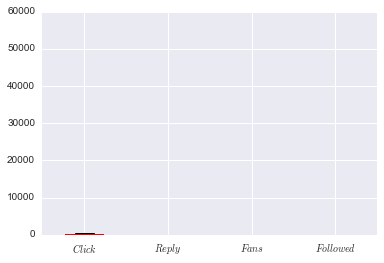

In [122]:
plt.boxplot([data.click, data.reply, 
             data.fans_num, data.followed_num], 
            labels = ['$Click$', '$Reply$', '$Fans$', '$Followed$'])
plt.show()

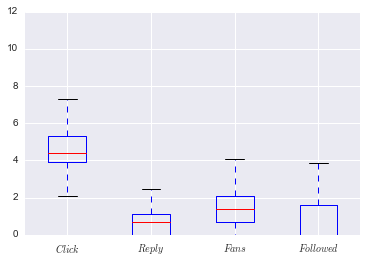

In [123]:
plt.boxplot([np.log(data.click+1), np.log(data.reply+1), 
             np.log(data.fans_num+1), np.log(data.followed_num + 1)], 
            labels = ['$Click$', '$Reply$', '$Fans$', '$Followed$'])
plt.show()

***
## 结论
1.我们分别对原始数据，原始数据的对数进行了框须图的可视化呈现。能够很直观的感受到，在数据处理中，取对数是有效观测数据的方式。
2.框须图的特性：
能够真实直观地表现数据形状的本来面貌，由于判断异常值的标准以四分位数和四分位距为基础，四分位数具有一定的耐抗性，多达25%的数据可以变得任意远而不会很大地扰动四分位数，所以异常值不能对这个标准施加影响，因此，框须图识别异常值的结果比较客观。
3.利用框须图对天涯论坛关于pm2.5主题帖的点击.回复.关注 以及粉丝数进行分析，结果如下：
  总体来看：点击.回复.关注 以及粉丝数都存在异常值。其中，点击量总体数值大于回复量，粉丝量总体大于关注者。从图形可知，点击数量的正态分布优于回复帖数，粉丝数正态分布优于回复数。
  为了更好分析了解数据，对点击数，回复数以及粉丝数进行柱状分布图分析。

***
## 2.2.2 点击量和回帖量（对数）柱状分布图

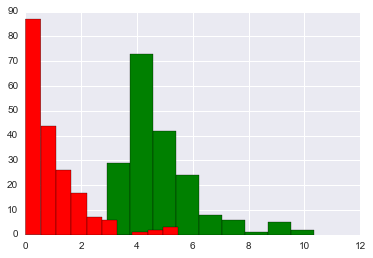

In [124]:
plt.hist(np.log(data.click+1), color='green')
plt.hist(np.log(data.reply+1), color='red')
plt.show()

***
## 2.2.3 粉丝数和关注数（对数）柱状分布图

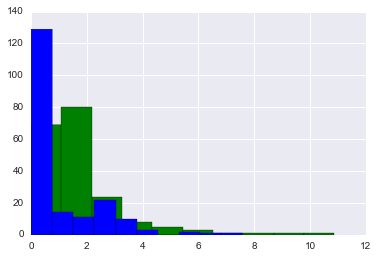

In [125]:
plt.hist(np.log(data.fans_num+1), color='green')
plt.hist(np.log(data.followed_num+1), color='blue')
plt.show()

***
## 结论
我们总共抓取了193个天涯论坛关于pm2.5的主题帖，分析结果如下：
1.结合框须图分析，可知点击数呈现正态分布，回帖数量则呈现非正态分布；粉丝数分布优于关注者数量分布；
2.点击数量最主要分布在0～5000之间，从图形显示，大概在90%左右。点击数的最大值为31056，最小值为7；
3.回帖数量最主要分布在0～500，从图形显示，大概在90%左右。回帖数最大值为237，最小则为0。


In [126]:
def transformData(dat):
    results = []
    for i in dat:
        if i != 'na':
            results.append( int(i))
        else:
            results.append(0)
    return results

In [127]:
data.fans_num = transformData(data.fans_num)
data.followed_num = transformData(data.followed_num )
data.post_num = transformData(data.post_num )
data.comment_num = transformData(data.comment_num )

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

## 2.3 数据相关性分析

***
## 2.3.1 click，reply,post,comment散点矩阵图

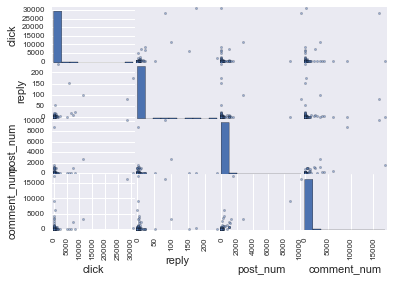

In [129]:
from pandas.tools import plotting

#fig = plt.figure(figsize=(10, 10))
plotting.scatter_matrix(data[['click', 'reply', 'post_num','comment_num']]) 
plt.show()

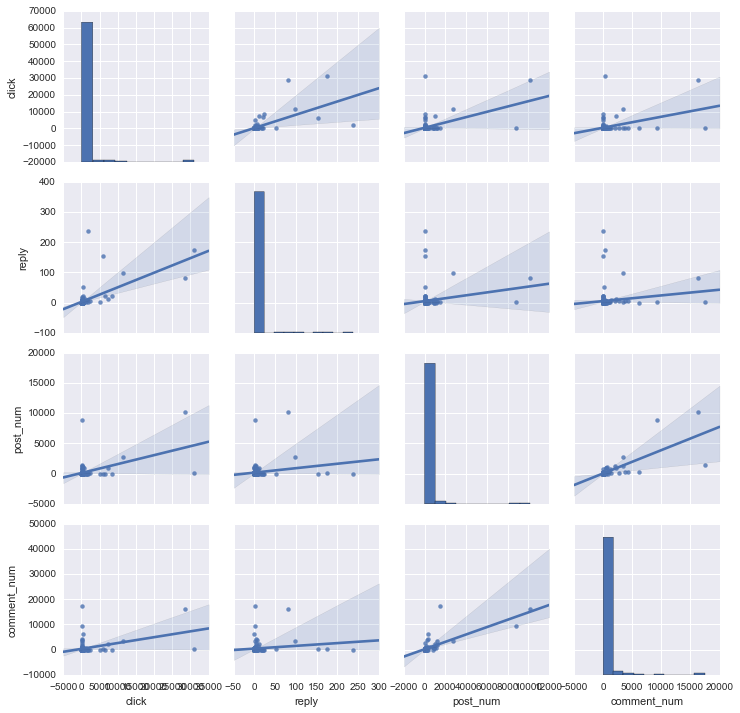

In [130]:
import seaborn # conda install seaborn
seaborn.pairplot(data, vars=['click', 'reply', 'post_num', 'comment_num'],
                  kind='reg')  

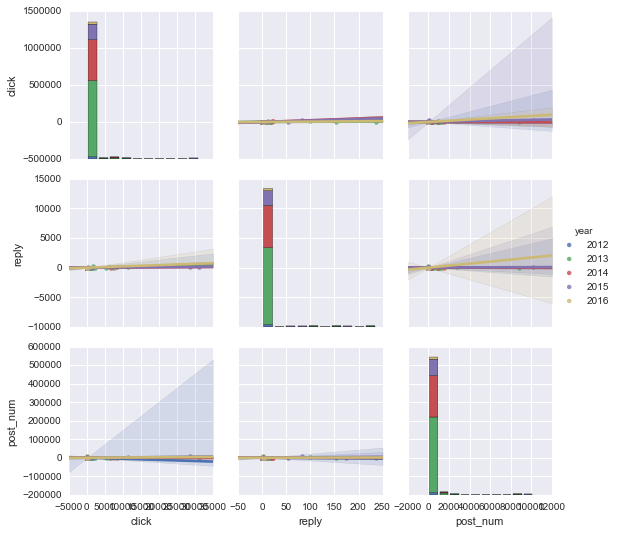

In [131]:
seaborn.pairplot(data, vars=['click', 'reply', 'post_num'],
                 kind='reg', hue='year')  

***
## 结论
从散点矩阵图显现的最佳拟合直线与置信带的特征观察可知，comment－reply的相关度以及click－comment的具有相对较强的线性关系，为了更好的说明这一点，下面我们会通过卡方检验来对其相关性进行分析。

加入了年份统计之后，可以比较得出天涯关于pm2.5主题的帖子，2013年数量最多，之后依次为2014,2015，其中2016和2012的数量很少。
由此推测，是否能与“关于pm2.5的讨论热度随时间降低”以及“天涯社区平台的衰弱”相关联。

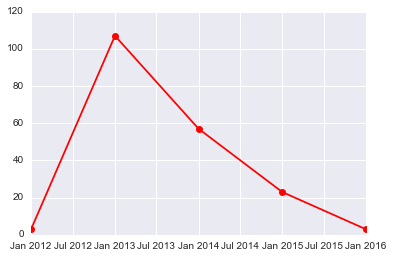

In [132]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
dd_date_str = map(lambda x: str(x) +'-01-01', dd.index)
dd_date = pd.to_datetime(dd_date_str)
plt.plot(dd_date, dd.year, 'r-o')
plt.show()

***
## 结论
上图验证了散点矩阵图中的结论：2013年，天涯杂谈关于pm2.5主题讨论贴的数量是最多的。

***
## 2.3.2 相关性线性回归分析

In [133]:
from scipy.stats import chisquare

In [134]:
from scipy.stats import chisqprob, chi2

In [135]:
print np.corrcoef(data.click, data.reply)

[[ 1.          0.61807658]
 [ 0.61807658  1.        ]]


In [136]:
data.corr()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
click,1.000000,0.618077,0.050597,0.350277,0.483890,0.389468,0.143359,0.135276,0.012514
reply,0.618077,1.000000,0.044762,0.298012,0.188204,0.143376,0.127596,0.034754,-0.077090
followed_num,0.050597,0.044762,1.000000,0.238142,0.121425,0.044801,-0.107241,-0.035487,0.117818
fans_num,0.350277,0.298012,0.238142,1.000000,0.329639,0.244157,-0.072214,-0.028843,-0.000947
post_num,0.483890,0.188204,0.121425,0.329639,1.000000,0.750541,0.029721,0.018313,0.008851
comment_num,0.389468,0.143376,0.044801,0.244157,0.750541,1.000000,0.017271,0.037927,0.007249
month,0.143359,0.127596,-0.107241,-0.072214,0.029721,0.017271,1.000000,-0.251942,-0.107584
year,0.135276,0.034754,-0.035487,-0.028843,0.018313,0.037927,-0.251942,1.000000,0.049317
day,0.012514,-0.077090,0.117818,-0.000947,0.008851,0.007249,-0.107584,0.049317,1.000000


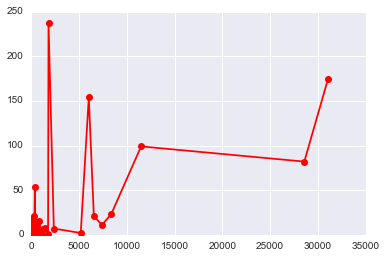

In [137]:
plt.plot(df.click, df.reply, 'r-o')
plt.show()

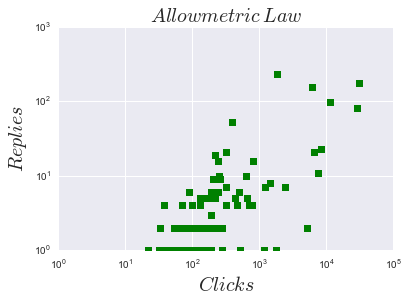

In [138]:
plt.plot(df.click, df.reply, 'gs')
plt.xlabel('$Clicks$', fontsize = 20)
plt.ylabel('$Replies$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('$Allowmetric\,Law$', fontsize = 20)
plt.show()

In [139]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [140]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [141]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 22 May 2016   Prob (F-statistic):           1.90e-08
Time:                        16:30:29   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [73]:
reg = smf.ols('reply ~ click + followed_num', data=data).fit()

In [74]:
print reg.summary()

                            OLS Regression Results                            
Dep. Variable:                  reply   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     58.77
Date:                Sun, 22 May 2016   Prob (F-statistic):           1.35e-20
Time:                        15:30:44   Log-Likelihood:                -852.99
No. Observations:                 193   AIC:                             1712.
Df Residuals:                     190   BIC:                             1722.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        2.6596      1.505      1.767   

In [75]:
reg1 = smf.ols('np.log(reply+1) ~ np.log(click+1) +np.log(followed_num+1)+month', data=data).fit()
print reg1.summary()

                            OLS Regression Results                            
Dep. Variable:      np.log(reply + 1)   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     76.36
Date:                Sun, 22 May 2016   Prob (F-statistic):           2.14e-32
Time:                        15:30:54   Log-Likelihood:                -212.66
No. Observations:                 193   AIC:                             433.3
Df Residuals:                     189   BIC:                             446.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

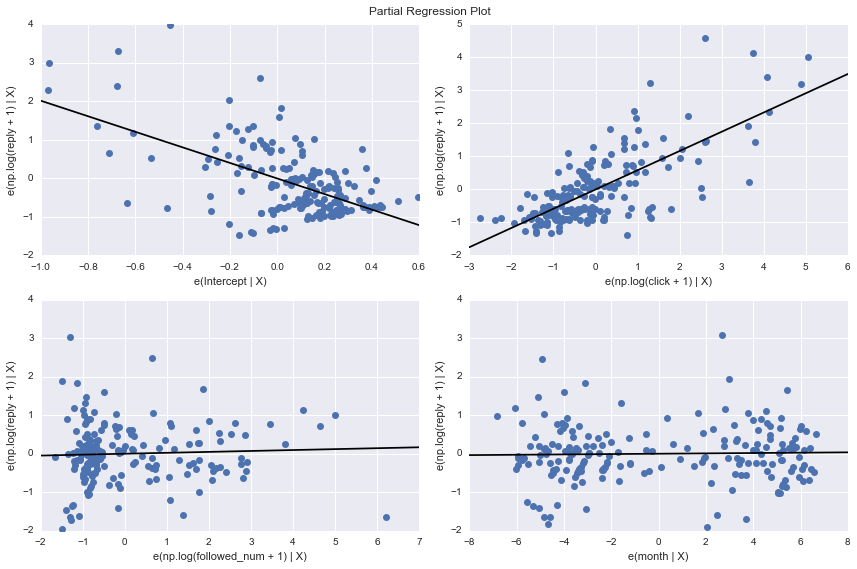

In [76]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg1, fig = fig)#控制其他变量以后
plt.show()

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car",
                                 cache=True) # load data
data = moore.data
data = data.rename(columns={"partner.status" :
                             "partner_status"})

In [78]:
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                 data=data).fit()

In [80]:
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print table

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  


***
## 结论
1.通过对数据的处理，进行reply ~ click + followed_numde1相关性回归分析，log之后Regression Results中的r-square值显示为0.548;Prob值为2.14e-32,小于0.05；所以reply ~ click + followed_num数据的线性相关性不显著。
2.在控制变量之后，可以看出reply与click的具有相对较好的相关性。